In [1]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, RMSprop, Nadam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.callbacks import ModelCheckpoint, EarlyStopping
import seaborn as sns

In [2]:
def drop_non_numeric_and_na_cols(df):
    # Get the list of non-numeric columns
    df = df.drop(columns=['Home_number','Rebuilt','Gush','Helka','Tat'], axis=1)
    df = df.dropna(subset=['Long','Lat','Rooms','Floor','Floors']).reset_index(drop=True)
    non_numeric_cols = list(df.select_dtypes(exclude=['number']).columns)
    
    # Get the list of columns that contain NaNs
    na_cols = list(df.columns[df.isna().any()])
    
    # Combine the two lists and drop the columns from the DataFrame
    cols_to_drop = list(set(non_numeric_cols) | set(na_cols))
    df = df.drop(cols_to_drop, axis=1)
    df = df[df['Price'] > 800000]
    df = df[df['Price'] < 12000000]
    return df



def neural_network_model(df):
    X = df.drop(['Price'], axis=1).values
    y = df['Price'].values
    print(df.columns)

    # Normalize the input data
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))

    optimizer = RMSprop(learning_rate=0.001)
    model.compile(loss='mean_absolute_error', optimizer=optimizer)

    # Use early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
    history = model.fit(X, y, epochs=200, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

    # Evaluate the model with different metrics
    loss = model.evaluate(X, y)
    print('MAE:', loss)
    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    print('R^2:', r2)
    
    return y_pred

df = pd.read_csv("../Data/Nadlan_clean.csv", index_col=0)
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
df['Year'] = df['Date'].dt.strftime('%Y')
df['Year'] = df['Year'].astype(int)
df = df[df['Year'] < 2022]
df = df[df['Year'] > 2012]

df = drop_non_numeric_and_na_cols(df)

y_pred = neural_network_model(df)
y_pred

Index(['Rooms', 'Floor', 'Size', 'Price', 'Build_year', 'Floors', 'Long',
       'Lat', 'Distance_sea', 'Year'],
      dtype='object')
Epoch 1/200
815/815 [==============================] - 2s 2ms/step - loss: 2165499.7500 - val_loss: 728568.7500
Epoch 2/200
815/815 [==============================] - 2s 2ms/step - loss: 948791.8125 - val_loss: 623745.4375
Epoch 3/200
815/815 [==============================] - 2s 2ms/step - loss: 817529.8750 - val_loss: 538650.5000
Epoch 4/200
815/815 [==============================] - 2s 3ms/step - loss: 729987.5000 - val_loss: 532253.8750
Epoch 5/200
815/815 [==============================] - 2s 3ms/step - loss: 711687.5625 - val_loss: 541696.1250
Epoch 6/200
815/815 [==============================] - 2s 2ms/step - loss: 704167.8750 - val_loss: 532500.0625
Epoch 7/200
815/815 [==============================] - 1s 2ms/step - loss: 700132.1250 - val_loss: 530260.3750
Epoch 8/200
815/815 [==============================] - 1s 2ms/step - loss: 697901.8125 

815/815 [==============================] - 2s 2ms/step - loss: 651078.6875 - val_loss: 474335.4688
Epoch 74/200
815/815 [==============================] - 2s 2ms/step - loss: 649705.7500 - val_loss: 474843.0938
Epoch 75/200
815/815 [==============================] - 2s 2ms/step - loss: 647834.1250 - val_loss: 466058.4688
Epoch 76/200
815/815 [==============================] - 2s 2ms/step - loss: 646220.6875 - val_loss: 468313.9062
Epoch 77/200
815/815 [==============================] - 3s 3ms/step - loss: 642988.7500 - val_loss: 483664.5312
Epoch 78/200
815/815 [==============================] - 3s 4ms/step - loss: 638138.2500 - val_loss: 475664.2500
Epoch 79/200
815/815 [==============================] - 3s 3ms/step - loss: 631662.3750 - val_loss: 448503.9062
Epoch 80/200
815/815 [==============================] - 4s 5ms/step - loss: 623212.9375 - val_loss: 449937.7188
Epoch 81/200
815/815 [==============================] - 2s 2ms/step - loss: 612453.0000 - val_loss: 444684.0312
Epoch

array([[2880815.2],
       [4938734. ],
       [2873280. ],
       ...,
       [1986919. ],
       [3566955.5],
       [1407647.2]], dtype=float32)

<AxesSubplot:>

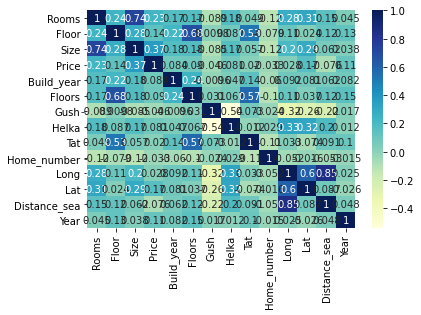

In [5]:
sns.heatmap(df.corr(), annot =True ,cmap ='YlGnBu')
